# Image classification using fruit images.

Image classification using 100x100 color jpg fruit images from https://www.kaggle.com/moltean/fruits

Warren Watts

In [1]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
import gc
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

D:\program_files2\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
fruit_images = []
labels = [] 
# scan through directories using glob module function glob
for fruit_dir_path in glob.glob("D:\\Datascience\\Python4ML\\fruits-360\\Training\\*"):
    # generate labels based on directory names
    fruit_label = fruit_dir_path.split("\\")[-1]
    print("Processing:",fruit_label, "in", fruit_dir_path)
    # scan through images in each directory using glob.glob
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        # resize to 50x50 originals 100x100
        image = cv2.resize(image, (50, 50))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # create list of images
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

Processing: Apple Braeburn in D:\Datascience\Python4ML\fruits-360\Training\Apple Braeburn
Processing: Apple Golden 1 in D:\Datascience\Python4ML\fruits-360\Training\Apple Golden 1
Processing: Apple Golden 2 in D:\Datascience\Python4ML\fruits-360\Training\Apple Golden 2
Processing: Apple Golden 3 in D:\Datascience\Python4ML\fruits-360\Training\Apple Golden 3
Processing: Apple Granny Smith in D:\Datascience\Python4ML\fruits-360\Training\Apple Granny Smith
Processing: Apple Red 1 in D:\Datascience\Python4ML\fruits-360\Training\Apple Red 1
Processing: Apple Red 2 in D:\Datascience\Python4ML\fruits-360\Training\Apple Red 2
Processing: Apple Red 3 in D:\Datascience\Python4ML\fruits-360\Training\Apple Red 3
Processing: Apple Red Delicious in D:\Datascience\Python4ML\fruits-360\Training\Apple Red Delicious
Processing: Apple Red Yellow 1 in D:\Datascience\Python4ML\fruits-360\Training\Apple Red Yellow 1
Processing: Apple Red Yellow 2 in D:\Datascience\Python4ML\fruits-360\Training\Apple Red Yel

### Create dictionaries for label/ID lookup.

In [3]:
label_to_id_table = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_table = {v: k for k, v in label_to_id_table.items()}
print(np.unique(labels))
id_to_label_table

['Apple Braeburn' 'Apple Golden 1' 'Apple Golden 2' 'Apple Golden 3'
 'Apple Granny Smith' 'Apple Red 1' 'Apple Red 2' 'Apple Red 3'
 'Apple Red Delicious' 'Apple Red Yellow 1' 'Apple Red Yellow 2' 'Apricot'
 'Avocado' 'Avocado ripe' 'Banana' 'Banana Red' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cherry 1' 'Cherry 2'
 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red' 'Cherry Wax Yellow'
 'Clementine' 'Cocos' 'Dates' 'Granadilla' 'Grape Blue' 'Grape Pink'
 'Grape White' 'Grape White 2' 'Grape White 3' 'Grape White 4'
 'Grapefruit Pink' 'Grapefruit White' 'Guava' 'Huckleberry' 'Kaki' 'Kiwi'
 'Kumquats' 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango'
 'Maracuja' 'Melon Piel de Sapo' 'Mulberry' 'Nectarine' 'Orange' 'Papaya'
 'Passion Fruit' 'Peach' 'Peach 2' 'Peach Flat' 'Pear' 'Pear Abate'
 'Pear Monster' 'Pear Williams' 'Pepino' 'Physalis' 'Physalis with Husk'
 'Pineapple' 'Pineapple Mini' 'Pitahaya Red' 'Plum' 'Pomegranate' 'Quince'
 'Rambutan' 'Raspberry'

{0: 'Apple Braeburn',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Granny Smith',
 5: 'Apple Red 1',
 6: 'Apple Red 2',
 7: 'Apple Red 3',
 8: 'Apple Red Delicious',
 9: 'Apple Red Yellow 1',
 10: 'Apple Red Yellow 2',
 11: 'Apricot',
 12: 'Avocado',
 13: 'Avocado ripe',
 14: 'Banana',
 15: 'Banana Red',
 16: 'Cactus fruit',
 17: 'Cantaloupe 1',
 18: 'Cantaloupe 2',
 19: 'Carambula',
 20: 'Cherry 1',
 21: 'Cherry 2',
 22: 'Cherry Rainier',
 23: 'Cherry Wax Black',
 24: 'Cherry Wax Red',
 25: 'Cherry Wax Yellow',
 26: 'Clementine',
 27: 'Cocos',
 28: 'Dates',
 29: 'Granadilla',
 30: 'Grape Blue',
 31: 'Grape Pink',
 32: 'Grape White',
 33: 'Grape White 2',
 34: 'Grape White 3',
 35: 'Grape White 4',
 36: 'Grapefruit Pink',
 37: 'Grapefruit White',
 38: 'Guava',
 39: 'Huckleberry',
 40: 'Kaki',
 41: 'Kiwi',
 42: 'Kumquats',
 43: 'Lemon',
 44: 'Lemon Meyer',
 45: 'Limes',
 46: 'Lychee',
 47: 'Mandarine',
 48: 'Mango',
 49: 'Maracuja',
 50: 'Melon Piel de Sa

In [4]:
# create integer IDs from label to id mapping table(dictionary)
label_ids = np.array([label_to_id_table[x] for x in labels])
pd.unique(label_ids)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86], dtype=int64)

### Look at fruit images

In [5]:
def pic_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    """Function to create a grid of images
       images: image array
       nb_rows: number of rows of images
       nb_cols: number of columns of images
       figsize: size of figure (total grid)
    """
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            # axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1        

45171
100


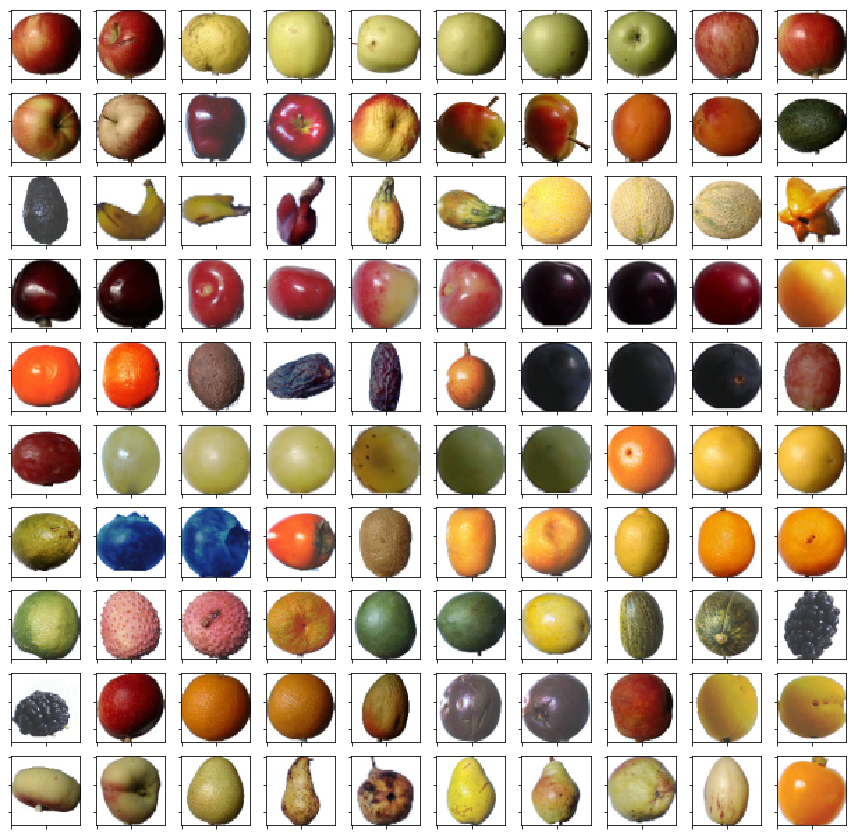

In [6]:
print(len(fruit_images))
print(len(fruit_images[0:33000:333]))
pic_grid(fruit_images[0:33000:333], 10, 10)

400


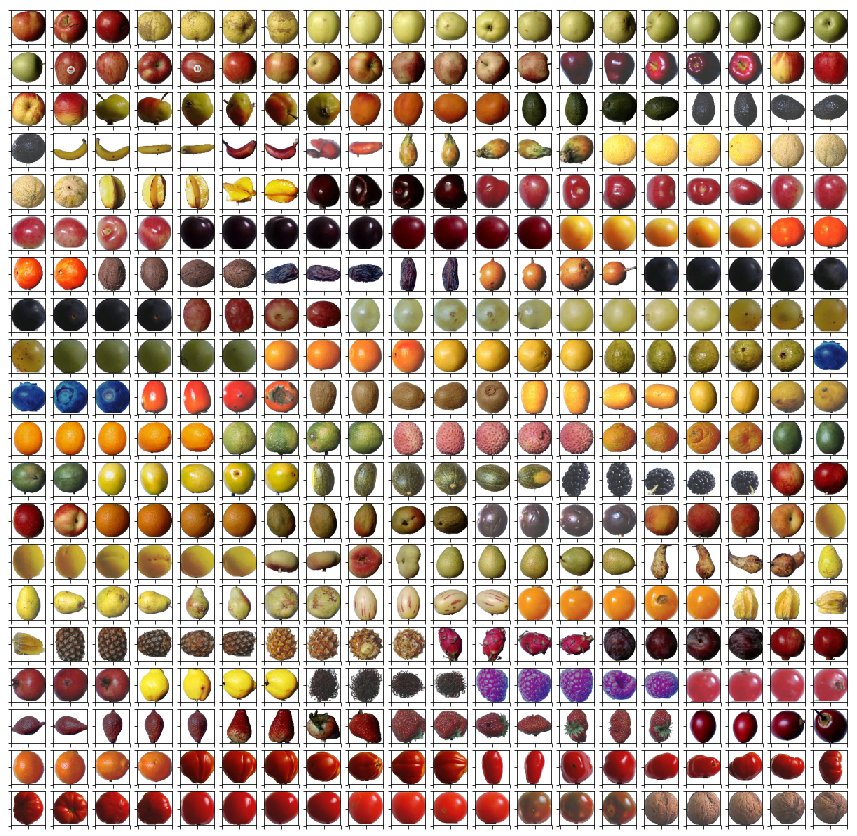

In [7]:
print(len(fruit_images[201:45001:112]))
pic_grid(fruit_images[201:45001:112], 20, 20)

In [8]:
# flatten fruit images
flat_fruit = [i.flatten() for i in fruit_images]
print(fruit_images.shape)
print(flat_fruit[1].shape)

del fruit_images
scaler = StandardScaler()
scaled_fruit = scaler.fit_transform(flat_fruit)
del flat_fruit
gc.collect()

(45171, 50, 50, 3)
(7500,)


613466

In [9]:
# reduce dimensions with PCA
pca = PCA(n_components=150)
pca_fruit = pca.fit_transform(scaled_fruit)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
del scaled_fruit
gc.collect()

[0.27195144 0.09674005 0.06385193 0.05780582 0.04283851 0.02500804
 0.02173499 0.01935788 0.01746114 0.01647945 0.01587956 0.01297798
 0.01063156 0.00940237 0.00921713 0.00819706 0.00798443 0.00741448
 0.0071313  0.00634838 0.00609304 0.0056876  0.00538621 0.00533326
 0.00495714 0.00471797 0.00437598 0.004232   0.00412699 0.00387355
 0.00383474 0.00369471 0.00343572 0.00337852 0.00326724 0.00321933
 0.00313212 0.00293318 0.00282756 0.00278892 0.00267673 0.0025426
 0.0024087  0.00237146 0.00226861 0.00220536 0.00219312 0.00212848
 0.0020649  0.00203235 0.00197868 0.00192651 0.00182885 0.00174592
 0.00169485 0.00166459 0.00165623 0.00160482 0.00159955 0.00156758
 0.00152241 0.00150403 0.00149867 0.00147104 0.00141595 0.0013772
 0.00136894 0.00133024 0.00132004 0.00128464 0.00126031 0.00123543
 0.0012283  0.00120907 0.00119143 0.00116197 0.00112339 0.00111108
 0.00108881 0.00105734 0.00104473 0.00102908 0.00102205 0.00101113
 0.00097542 0.00096169 0.00094166 0.0009224  0.00090813 0.000886

0

In [10]:
# reduce dimensions further for plotting with tSNE - tSNE preserves local distance
# better for classification. I tried tSNE before PCA but the run took forever.
# even this run was pretty long, did it overnight should have timed it. I don't
# know how long it took, but more than 15 minutes.
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_fruit = tsne.fit_transform(pca_fruit)


In [11]:
def visualize_scatter(data_2d, label_ids, id_to_label_dict=None, figsize=(15,15)):
    """
    Function to create a scatter plot for any number of classes
    data_2d - 2 dimensional points for plotting, numpy.ndarray
    label_ids - list of numeric label IDs, must match number of rows in data_2d
    id_to_label_dict - dictionary map for numeric id to text label look up.
    figsize - figure size
    """
    # create numeric label to label data if labels not passed as parameter
    if not id_to_label_dict:
        id_to_label_dict = {v:i for i,v in enumerate(np.unique(label_ids))}
    
    # set up plot
    plt.figure(figsize=figsize)
    plt.grid()
    
    # determine number of classes
    nb_classes = len(np.unique(label_ids))
    
    # pick color map
    cmap = plt.cm.get_cmap("jet", nb_classes)
    
    # plot each class with scatter plot
    for i, label_id in enumerate(np.unique(label_ids)):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    c= cmap(i),
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    #plt.legend(loc='best')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True, ncol=1, fontsize=figsize[0])

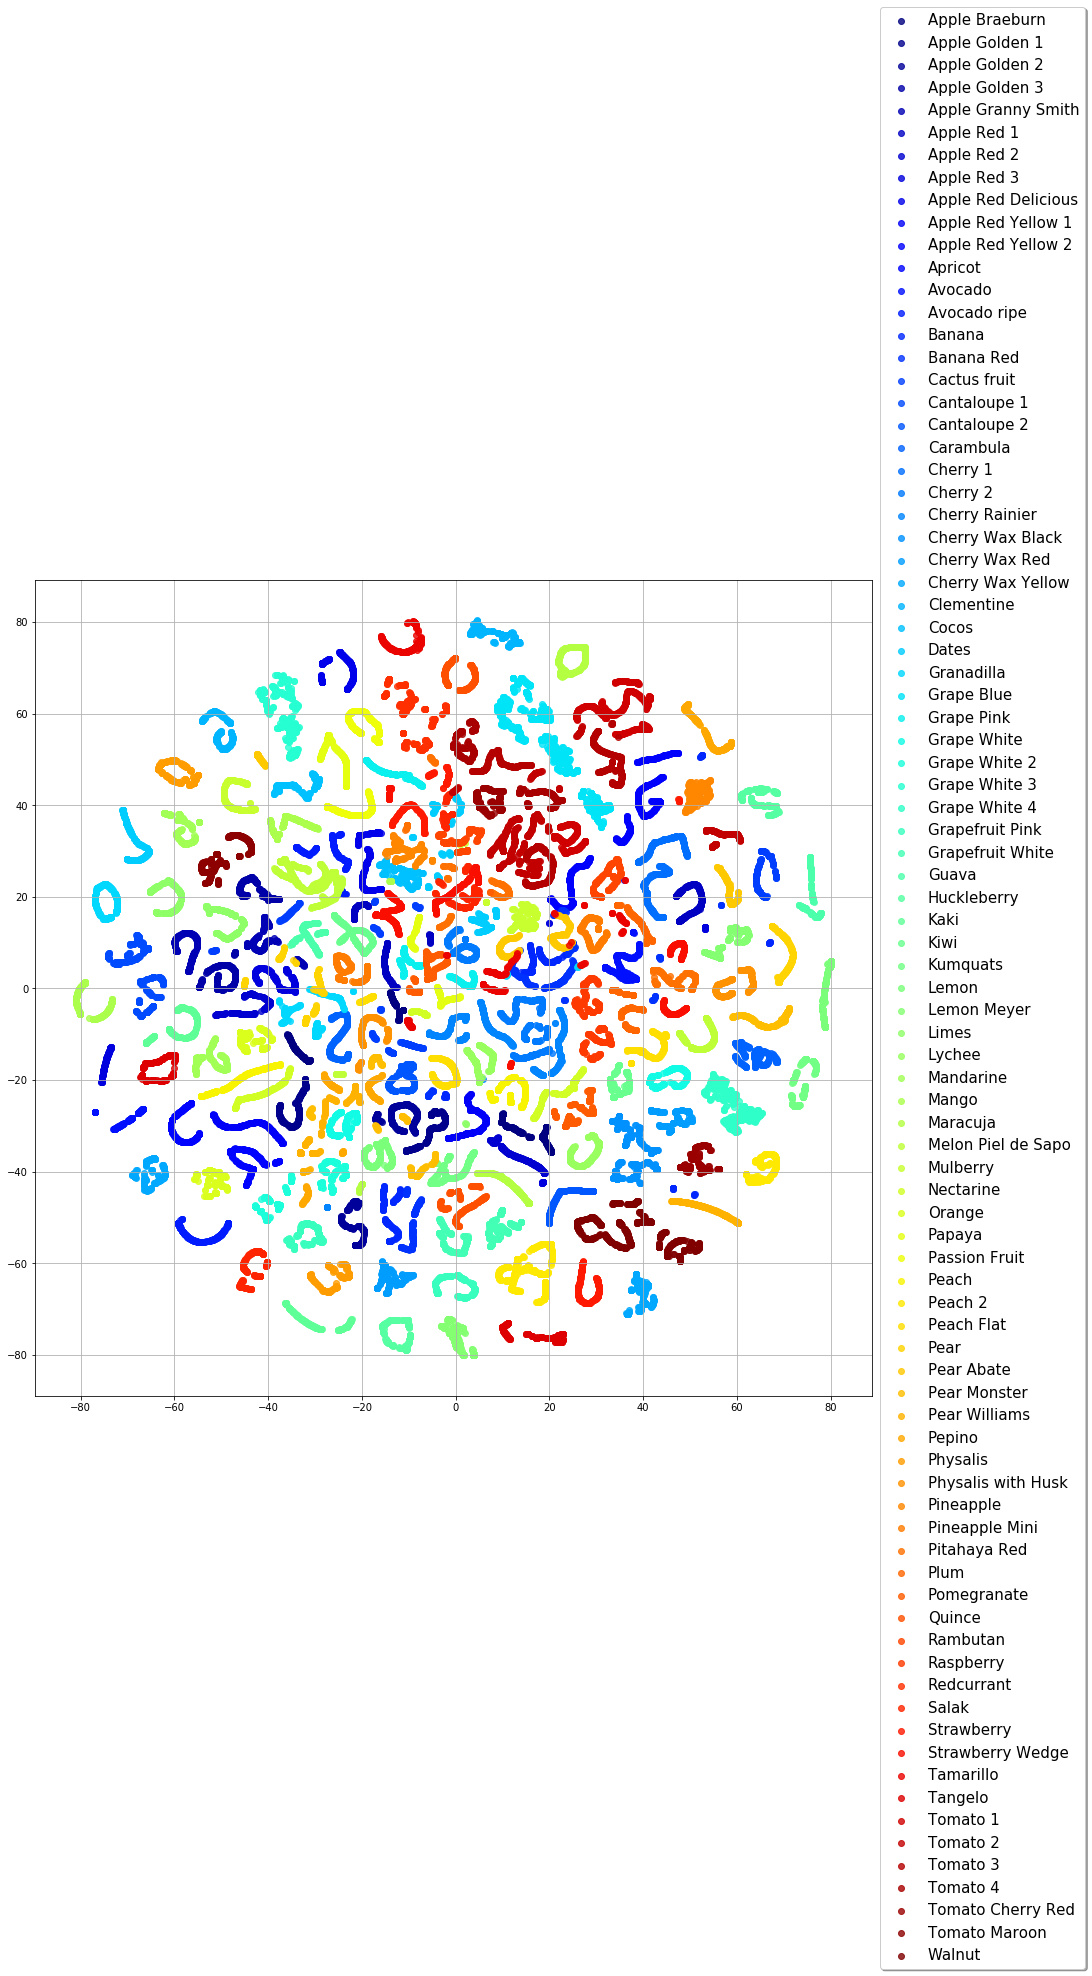

In [12]:
# show classes in 2 dimensions with tSNE

visualize_scatter(tsne_fruit, label_ids, id_to_label_table)

In [13]:
# split data for train and test
X_train, X_test, y_train, y_test = train_test_split(pca_fruit, label_ids, test_size=0.25, random_state=42)

In [14]:
# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
print(nb_model)
# make predictions
expected = y_test
predicted = nb_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Naive Bayes: {0:.6f}".format(precision))
print(metrics.classification_report(expected, predicted))
# metrics.confusion_matrix(expected, predicted) # - too big 

GaussianNB(priors=None)
Accuracy with Naive Bayes: 87.771186
             precision    recall  f1-score   support

          0       0.96      0.90      0.93       131
          1       0.73      0.94      0.82       129
          2       0.97      0.79      0.87       133
          3       0.86      0.95      0.91       121
          4       0.99      0.85      0.91       133
          5       0.89      0.85      0.87       123
          6       0.70      0.91      0.79       129
          7       0.87      0.96      0.91       115
          8       0.91      0.96      0.94       133
          9       0.85      0.95      0.90       109
         10       0.69      0.38      0.49       165
         11       0.89      0.91      0.90       123
         12       0.87      0.83      0.85       125
         13       1.00      0.76      0.86       123
         14       0.61      0.84      0.71       122
         15       0.56      0.51      0.53       138
         16       0.84      0.66     

In [15]:
# Logistic Regression model
lr_model = LogisticRegression(solver = 'lbfgs',random_state=10)
lr_model.fit(X_train,y_train)
print(lr_model)
# make predictions
expected = y_test
predicted = lr_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Logistic Regression: {0:.6f}".format(precision))
print(metrics.classification_report(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy with Logistic Regression: 99.831754
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       131
          1       0.99      1.00      1.00       129
          2       1.00      1.00      1.00       133
          3       1.00      1.00      1.00       121
          4       1.00      1.00      1.00       133
          5       0.98      1.00      0.99       123
          6       1.00      1.00      1.00       129
          7       1.00      1.00      1.00       115
          8       1.00      1.00      1.00       133
          9       1.00      1.00      1.00       109
         10       1.00      1.00      1.00       165
         11       0.99      1.00      1.00       123
      

In [16]:
# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)
print(lda_model)
# make predictions
expected = y_test
predicted = lda_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Linear Discriminant Analysis: {0:.6f}".format(precision))
print(metrics.classification_report(expected, predicted))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Accuracy with Linear Discriminant Analysis: 93.597804
             precision    recall  f1-score   support

          0       0.82      0.93      0.87       131
          1       0.76      1.00      0.87       129
          2       0.94      0.79      0.86       133
          3       0.85      1.00      0.92       121
          4       0.94      0.89      0.91       133
          5       0.96      0.96      0.96       123
          6       0.84      0.92      0.88       129
          7       0.96      0.99      0.97       115
          8       0.92      0.83      0.87       133
          9       0.98      0.84      0.91       109
         10       1.00      0.99      1.00       165
         11       0.99      0.99      0.99       123
         12       1.00      0.87      0.93       125
         13       0.95      0.97      0.96       123
         14

In [17]:
# QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train,y_train)
print(lda_model)
# make predictions
print(qda_model)
# make predictions
expected = y_test
predicted = qda_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Quadratic Discriminant Analysis: {0:.6f}".format(precision))
print(metrics.classification_report(expected, predicted))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
Accuracy with Quadratic Discriminant Analysis: 99.929160
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       131
          1       1.00      1.00      1.00       129
          2       1.00      1.00      1.00       133
          3       1.00      1.00      1.00       121
          4       1.00      1.00      1.00       133
          5       1.00      1.00      1.00       123
          6       1.00      1.00      1.00       129
          7       0.99      1.00      1.00       115
          8       1.00      1.00      1.00       133
          9       1.00      1.00      1.00       109
         10       1.00      1.00      1.00       165
         11       1.00      1.00  

In [18]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
print(dt_model)
# make predictions
expected = y_test
predicted = dt_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Decision Tree: {0:.6f}".format(precision))
print(metrics.classification_report(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Accuracy with Decision Tree: 96.050651
             precision    recall  f1-score   support

          0       0.94      0.92      0.93       131
          1       0.97      0.97      0.97       129
          2       0.95      0.95      0.95       133
          3       0.95      0.98      0.97       121
          4       0.96      0.95      0.96       133
          5       0.93      0.93      0.93       123
          6       0.92      0.94      0.93       129
          7       0.90      0.87      0.88       115
          8       0.91      0.95      0.93       133
          9       0.94      0.93      0.93       109
         10       0.96      0

In [19]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train,y_train)
print(rf_model)
# make predictions
expected = y_test
predicted = rf_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Random Forest, n_estimators = 10: {0:.6f}".format(precision))
print(metrics.classification_report(expected, predicted))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Accuracy with Random Forest, n_estimators = 10: 99.433277
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       131
          1       0.96      1.00      0.98       129
          2       1.00      1.00      1.00       133
          3       0.98      1.00      0.99       121
          4       0.99      1.00      1.00       133
          5       0.98      1.00      0.99       123
          6       0.98      0.99      0.99       129
          7       0.99      0.98      0.99       115
          8       0.97      1.00      0.99       133
    

In [20]:
# Support Vector Machine model
svm_model = svm.SVC(random_state=42)
svm_model.fit(X_train,y_train)
print(svm_model)
# make predictions
expected = y_test
predicted = svm_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Support Vector Machine: {0:.6f}".format(precision))
print(metrics.classification_report(expected, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
Accuracy with Support Vector Machine: 96.086071
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       131
          1       1.00      0.98      0.99       129
          2       1.00      0.98      0.99       133
          3       1.00      0.98      0.99       121
          4       1.00      0.97      0.98       133
          5       1.00      0.98      0.99       123
          6       1.00      0.95      0.98       129
          7       1.00      0.88      0.94       115
          8       1.00      1.00      1.00       133
          9       1.00      0.99      1.00       109
         10       1.00      0.99      1.00       165
         11       1.00      0.99      1.00       123
         12       1.00      0.88      0

In [21]:
# K Nearest Neighbors model, n = 3
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)
print(knn_model)
# make predictions
expected = y_test
predicted = knn_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with K Nearest Neighbors, n = 3: {0:.6f}".format(precision))
print(metrics.classification_report(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Accuracy with K Nearest Neighbors, n = 3: 99.884884
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       131
          1       1.00      1.00      1.00       129
          2       1.00      1.00      1.00       133
          3       1.00      1.00      1.00       121
          4       1.00      1.00      1.00       133
          5       1.00      1.00      1.00       123
          6       1.00      1.00      1.00       129
          7       1.00      1.00      1.00       115
          8       1.00      1.00      1.00       133
          9       1.00      1.00      1.00       109
         10       0.99      1.00      0.99       165
         11       1.00      1.00      1.00       123
         12       1.00      1.00      1.00       125
         13       1.00      1.00      1.0

In [22]:
# K Nearest Neighbors model, n = 5
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)
print(knn_model)
# make predictions
expected = y_test
predicted = knn_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with K Nearest Neighbors, n = 5: {0:.6f}".format(precision))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Accuracy with K Nearest Neighbors, n = 5: 99.796334


In [23]:
# Random Forest model tuning, more trees, n_estimators = 50
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train,y_train)
print(rf_model)
# make predictions
expected = y_test
predicted = rf_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Random Forest, n_estimators = 50: {0:.6f}".format(precision))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Accuracy with Random Forest, n_estimators = 50: 99.893739


In [32]:
# Random Forest model tuning, even more trees, n_estimators = 120
rf_model = RandomForestClassifier(n_estimators=120, random_state=42)
rf_model.fit(X_train,y_train)
print(rf_model)
# make predictions
expected = y_test
predicted = rf_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with Random Forest, n_estimators = 120: {0:.6f}".format(precision))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Accuracy with Random Forest, n_estimators = 120: 99.938015


In [29]:
# K Nearest Neighbors model, n = 3, weights = 'distance'
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
knn_model.fit(X_train,y_train)
print(knn_model)
# make predictions
expected = y_test
predicted = knn_model.predict(X_test)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, y_test) * 100
print("Accuracy with K Nearest Neighbors, n = 4, weights = distance: {0:.6f}".format(precision))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
Accuracy with K Nearest Neighbors, n = 4, weights = distance: 99.946870


## Ranking of model accuracy:

1. K Nearest Neighbors, n = 4, weights = 'distance': 99.946870
2. Random Forest, n_estimators = 120: 99.938015
3. QDA: 99.929160
4. Random Forest, n_estimators = 50: 99.893739
5. K Nearest Neighbors, n = 3: 99.884884
6. Logistic Regression: 99.840609
7. KNN, n = 5: 99.796334
8. Random Forest, n_estimators = 10: 99.442132
9. Decision Tree: 96.121491
10. Support Vector Machine: 96.103781
11. Linear Discriminant Analysis: 93.491543
12. Naive Bayes: 87.647215


## Validate with Test Data for Top 3


In [38]:
# get validation images
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("D:\\Datascience\\Python4ML\\fruits-360\\Test\\*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    print("Processing:",fruit_label, "in", fruit_dir_path)
    # scan through images in each directory using glob.glob
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        # resize to 50x50 originals 100x100
        image = cv2.resize(image, (50, 50))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # create list of images
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)
# attach IDs
validation_label_ids = np.array([label_to_id_table[x] for x in validation_labels])
# scale
validation_images_scaled = scaler.transform([i.flatten() for i in validation_fruit_images])
# dimension reduction with PCA
validation_pca_result = pca.transform(validation_images_scaled)

Processing: Apple Braeburn in D:\Datascience\Python4ML\fruits-360\Test\Apple Braeburn
Processing: Apple Golden 1 in D:\Datascience\Python4ML\fruits-360\Test\Apple Golden 1
Processing: Apple Golden 2 in D:\Datascience\Python4ML\fruits-360\Test\Apple Golden 2
Processing: Apple Golden 3 in D:\Datascience\Python4ML\fruits-360\Test\Apple Golden 3
Processing: Apple Granny Smith in D:\Datascience\Python4ML\fruits-360\Test\Apple Granny Smith
Processing: Apple Red 1 in D:\Datascience\Python4ML\fruits-360\Test\Apple Red 1
Processing: Apple Red 2 in D:\Datascience\Python4ML\fruits-360\Test\Apple Red 2
Processing: Apple Red 3 in D:\Datascience\Python4ML\fruits-360\Test\Apple Red 3
Processing: Apple Red Delicious in D:\Datascience\Python4ML\fruits-360\Test\Apple Red Delicious
Processing: Apple Red Yellow 1 in D:\Datascience\Python4ML\fruits-360\Test\Apple Red Yellow 1
Processing: Apple Red Yellow 2 in D:\Datascience\Python4ML\fruits-360\Test\Apple Red Yellow 2
Processing: Apricot in D:\Datascience\

In [41]:
# K Nearest Neighbors, n=4, weights='distance'
print(knn_model)
validation_predictions = knn_model.predict(validation_pca_result)
precision = metrics.accuracy_score(validation_predictions, validation_label_ids) * 100
print("Validation Accuracy with K Nearest Neighbors, n=4, weights='distance': {0:.6f}".format(precision))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
Validation Accuracy with K Nearest Neighbors, n=4, weights='distance': 94.721562


In [40]:
# Random forest with 120 trees (n_estimators = 120)
print(rf_model)
validation_predictions = rf_model.predict(validation_pca_result)
precision = metrics.accuracy_score(validation_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest, n_estimators = 120: {0:.6f}".format(precision))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Validation Accuracy with Random Forest, n_estimators = 120: 92.656374


In [43]:
# QDA
print(qda_model)
validation_predictions = qda_model.predict(validation_pca_result)
precision = metrics.accuracy_score(validation_predictions, validation_label_ids) * 100
print("Validation Accuracy with QDA: {0:.6f}".format(precision))

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
Validation Accuracy with QDA: 94.813935


## Rebuild top three models with all training data and revalidate.

See if full training data improves models

In [44]:
# K Nearest Neighbors model, n = 3, weights = 'distance'
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
knn_model.fit(pca_fruit,label_ids)
print(knn_model)
# make predictions
validation_predictions = knn_model.predict(validation_pca_result)
precision = metrics.accuracy_score(validation_predictions, validation_label_ids) * 100
print("Validation Accuracy with K Nearest Neighbors, n=4, weights='distance': {0:.6f}".format(precision))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
Validation Accuracy with K Nearest Neighbors, n=4, weights='distance': 95.077857


In [47]:
# Random Forest model tuning, even more trees, n_estimators = 120
rf_model = RandomForestClassifier(n_estimators=120, random_state=42)
rf_model.fit(pca_fruit,label_ids)
print(rf_model)
# make predictions
predicted = rf_model.predict(validation_pca_result)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, validation_label_ids) * 100
print("Validation Accuracy with Random Forest, n_estimators = 120: {0:.6f}".format(precision))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Validation Accuracy with Random Forest, n_estimators = 120: 93.197414


In [48]:
# QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(pca_fruit,label_ids)
print(qda_model)
# make predictions
predicted = qda_model.predict(validation_pca_result)
# summarize the fit of the model
precision = metrics.accuracy_score(predicted, validation_label_ids) * 100
print("Validation Accuracy with Quadratic Discriminant Analysis: {0:.6f}".format(precision))

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
Validation Accuracy with Quadratic Discriminant Analysis: 95.506730


## QDA actually outperforms other models on kaggle test data